# 1. Titanic

## 1-1. 문제 정의및 가설 수립
* 나이가 어릴수록 생존률이 높을 것이다.
* 여자의 생존률이 남자보다 높을 것이다.
* 높은 등급일수록 생존률이 높을 것이다.

## 1-2. 데이터 가져오기
* kaggle 데이터 : https://www.kaggle.com/
* 공공 데이터 포털 : https://www.data.go.kr/
* 서울 열린데이터 광장 : https://data.seoul.go.kr/
* 통계청 : https://kosis.kr/
* 기상청 : https://data.kma.go.kr/

In [1]:
#!kaggle competitions download -c titanic --force

In [2]:
#!tar -xvf titanic.zip

## 1-3. 데이터 로드하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 한글 컬럼명 바꾸기
# 생존여부 (0: 사망, 1: 생존)
df.columns = ['id','생존여부','객실등급','이름','성별','나이','형제배우자수','부모자식수','티켓번호','요금','수하물번호','선착장']
df.head()

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모자식수,티켓번호,요금,수하물번호,선착장
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1-4. 데이터 살펴보기

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      891 non-null    int64  
 1   생존여부    891 non-null    int64  
 2   객실등급    891 non-null    int64  
 3   이름      891 non-null    object 
 4   성별      891 non-null    object 
 5   나이      714 non-null    float64
 6   형제배우자수  891 non-null    int64  
 7   부모자식수   891 non-null    int64  
 8   티켓번호    891 non-null    object 
 9   요금      891 non-null    float64
 10  수하물번호   204 non-null    object 
 11  선착장     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,id,생존여부,객실등급,나이,형제배우자수,부모자식수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

id          0
생존여부        0
객실등급        0
이름          0
성별          0
나이        177
형제배우자수      0
부모자식수       0
티켓번호        0
요금          0
수하물번호     687
선착장         2
dtype: int64

In [10]:
df.객실등급.value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [11]:
df.선착장.value_counts()

S    644
C    168
Q     77
Name: 선착장, dtype: int64

In [12]:
df.나이.value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: 나이, Length: 88, dtype: int64

In [13]:
# 불필요한 컬럼 삭제하기
# ID, 이름, 티켓번호, 요금, 수하물번호, 
df.head()
df.drop(['id','이름','티켓번호','요금','수하물번호'],axis=1, inplace=True)

In [14]:
df

,생존여부,객실등급,성별,나이,형제배우자수,부모자식수,선착장
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


## 1-5. EDA(탐색적 데이터 분석)

### 1. 생존자수 보기

In [15]:
df.생존여부.value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

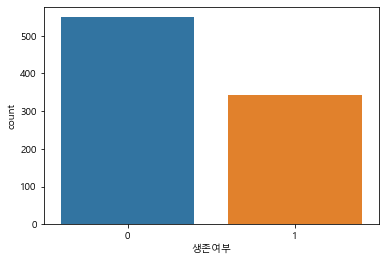

In [16]:
# count plot
sns.countplot(x='생존여부',data=df)
plt.show()

([<matplotlib.patches.Wedge at 0x1fadfd52190>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'dead'),
  Text(0.3925750313068116, -1.0275625746369201, 'survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

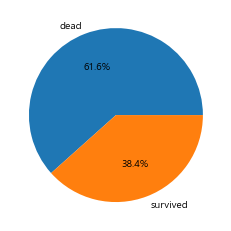

In [17]:
# Pie Chart
plt.pie(df.생존여부.value_counts(), labels=['dead','survived'], autopct='%.1f%%')

## 2. 나이별 데이터 분석

In [18]:
df.나이.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

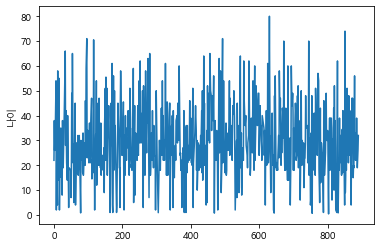

In [19]:
# 나이 분포도
sns.lineplot(data=df.나이)
plt.show()

In [20]:
df.loc[df.나이 < 10, '생존여부'].count()

62

In [21]:
df.loc[df.나이 < 10, '생존여부'].sum()

38

In [22]:
38/62

0.6129032258064516

In [23]:
df.loc[df.나이 < 10, '생존여부'].mean()

0.6129032258064516

In [24]:
survival_rate = []
for i in range(10, 91, 10): # 10~90
    survival_rate.append(df.loc[(df.나이 < i) & (df.나이 >= i-10), '생존여부'].mean())

In [25]:
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

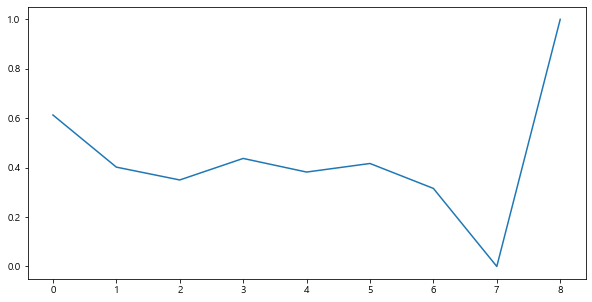

In [26]:
plt.figure(figsize=(10,5))
plt.plot(survival_rate)

In [27]:
sns.__version__

'0.11.1'

# 3. 성별에 따른 분석

In [28]:
df.groupby('성별')['생존여부'].count().to_frame()

,생존여부
성별,
female,314
male,577


In [29]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\kongy\anaconda3\lib\site-packages (0.11.1)


In [30]:
df.groupby('성별')['생존여부'].sum().to_frame()

,생존여부
성별,
female,233
male,109


<AxesSubplot:xlabel='성별', ylabel='count'>

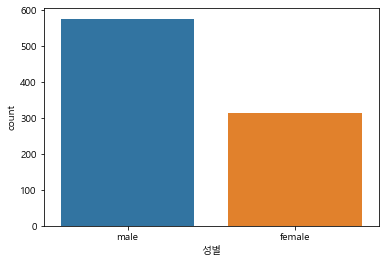

In [31]:
sns.countplot(x='성별',data=df)

<AxesSubplot:xlabel='성별', ylabel='count'>

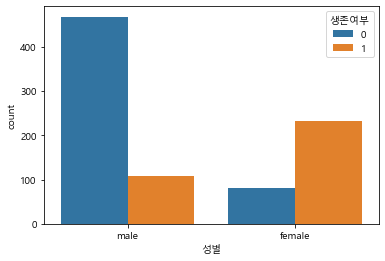

In [32]:
sns.countplot(x='성별',data=df, hue='생존여부')

In [33]:
df.groupby('성별')['생존여부'].mean().to_frame()

,생존여부
성별,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='성별', ylabel='생존여부'>

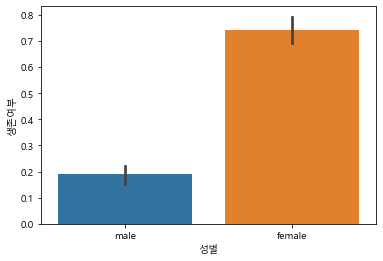

In [34]:
sns.barplot(x='성별', y='생존여부', data=df)

여성의 생존율이 남성보다 높다는 가설은 성립한다.

## 4. 객실등급별 데이터 분석

In [35]:
df.groupby('객실등급')['생존여부'].count().to_frame()

,생존여부
객실등급,
1,216
2,184
3,491


<AxesSubplot:xlabel='객실등급', ylabel='count'>

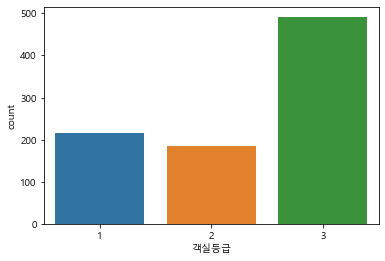

In [36]:
sns.countplot(x='객실등급', data=df)

In [37]:
df.groupby('객실등급')['생존여부'].sum().to_frame()

,생존여부
객실등급,
1,136
2,87
3,119


<AxesSubplot:xlabel='객실등급', ylabel='count'>

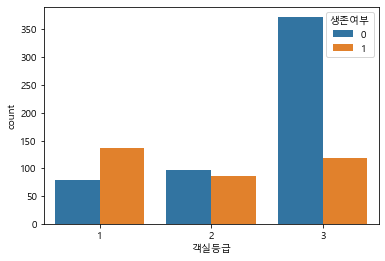

In [38]:
sns.countplot(x='객실등급',data=df, hue='생존여부')

In [39]:
# 객실등급별 생존률
df.groupby('객실등급')['생존여부'].mean().to_frame()

,생존여부
객실등급,
1,0.629630
2,0.472826
3,0.242363


Text(0, 0.5, '생존율')

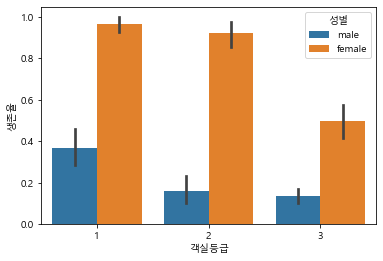

In [40]:
sns.barplot(x='객실등급',y='생존여부', data=df,hue='성별')
plt.ylabel('생존율')

1등급 객실의 생존율이 3등급 객실의 생존율보다 높다는 가설 성립

In [41]:
# 5. 상관관계 분석

In [42]:
df.corr()

,생존여부,객실등급,나이,형제배우자수,부모자식수
생존여부,1.000000,-0.338481,-0.077221,-0.035322,0.081629
객실등급,-0.338481,1.000000,-0.369226,0.083081,0.018443
나이,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
형제배우자수,-0.035322,0.083081,-0.308247,1.000000,0.414838
부모자식수,0.081629,0.018443,-0.189119,0.414838,1.000000


<AxesSubplot:>

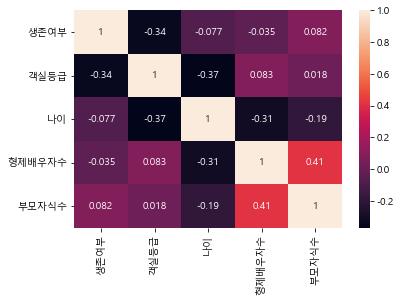

In [43]:
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df.corr(), annot=True)

In [44]:
map = {'male':0,'female':1}
df['성별코드'] = df['성별'].map(map)

In [46]:
df

,생존여부,객실등급,성별,나이,형제배우자수,부모자식수,선착장,성별코드
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0
887,1,1,female,19.0,0,0,S,1
888,0,3,female,NaN,1,2,S,1
889,1,1,male,26.0,0,0,C,0


In [51]:
df.loc[].to_frame()

SyntaxError: invalid syntax (<ipython-input-51-123ca0505bae>, line 1)